# Utilization rate per resource

low_utilization


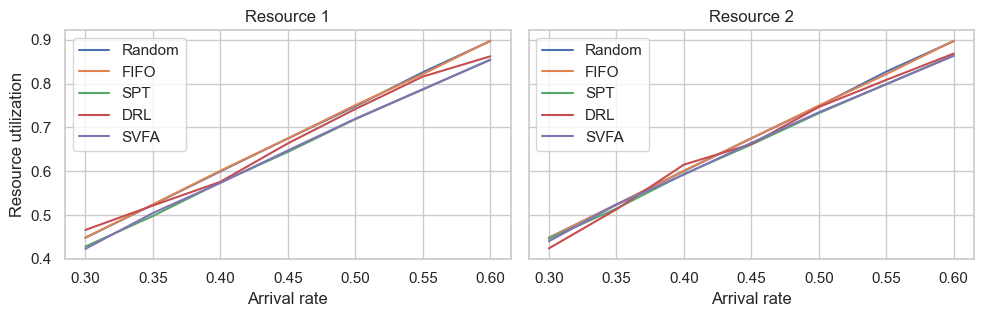

high_utilization


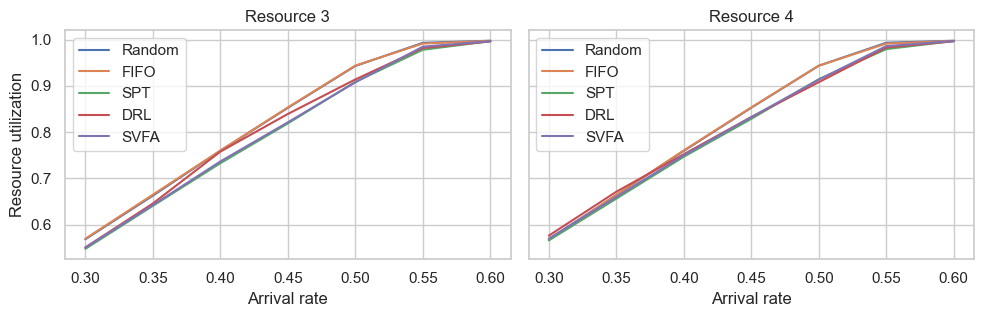

slow_server


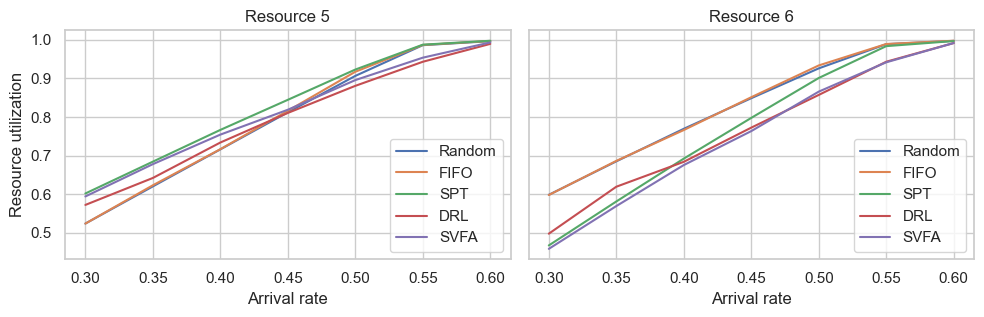

down_stream


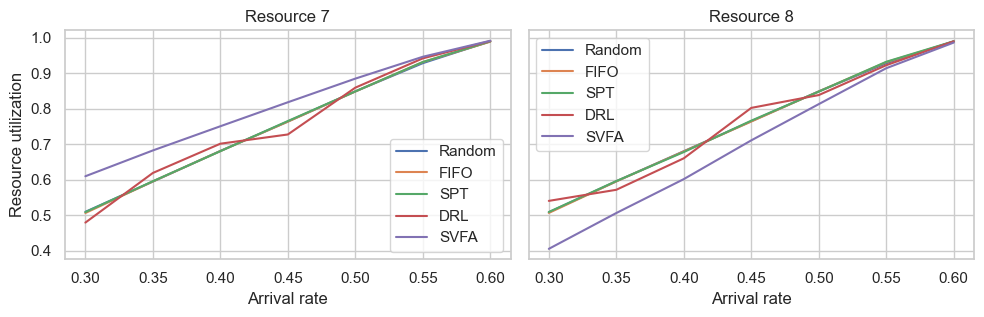

n_system


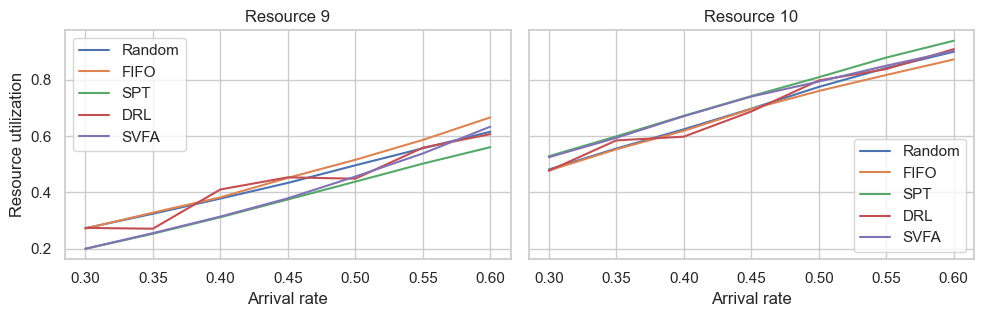

parallel


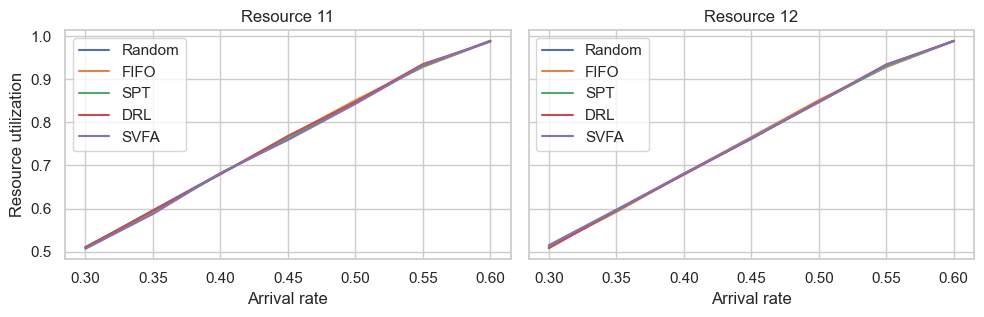

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import re

def rename_utilization_columns(df, i):
    new_columns = {}
    for col in df.columns:
        match = re.match(r'utilization_(\d+)', col)
        if match:
            new_columns[col] = f'Resource {int(match.group(1))+(i*2)}'
    return df.rename(columns=new_columns)

# Set Seaborn theme for better aesthetics
sns.set(style='whitegrid')

configs = ['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system', 'parallel']
arrival_rates = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
policies = ['random', 'FIFO', 'SPT', 'PPO', 'SVFA']
heuristic_policy_names = {'random': 'Random', 'FIFO': 'FIFO', 'SPT': 'ShortestProcessingTime', 'PPO': 'PPO'}
label_policy_names = {'random': 'Random', 'FIFO': 'FIFO', 'SPT': 'SPT', 'PPO': 'DRL', 'SVFA': 'SVFA','DDQN': 'DDQN', 'ParkSong': 'ParkSong'}

dfs_svfa = pkl.load(open('./results_revision/results_SVFA/dfs_simple.pkl', 'rb'))
dfs_svfa_comp = pkl.load(open('./results_revision/results_SVFA/dfs.pkl', 'rb'))

# Initialize data structure without pre-defining resources
utilization_data = {config: {policy: {} for policy in policies} for config in configs}

# Process data
for i, config in enumerate(configs):
    for arrival_rate in arrival_rates:
        for policy in policies:
            if policy == 'SVFA': 
                if 'complete' not in config:
                    df = dfs_svfa[(arrival_rate, config)]
                else:
                    df = dfs_svfa_comp[(arrival_rate, config)]
                df = rename_utilization_columns(df, i)
            else:
                df = pd.read_csv(f'results_revision/results_{policy}/{heuristic_policy_names[policy]}_{config}_{str(arrival_rate)}.txt')
            columns_with_resource = [col for col in df.columns if 'Resource' in col]
            # Dynamically update the resources for each policy and config
            if not utilization_data[config][policy]:
                utilization_data[config][policy] = {resource: [] for resource in columns_with_resource}
            for resource in columns_with_resource:
                avg_utilization = df[resource].mean()
                utilization_data[config][policy][resource].append(avg_utilization)

# Plotting with Seaborn
for config, policies_data in utilization_data.items():
    print(config)
    resources = next(iter(policies_data.values())).keys()
    num_resources = len(resources)
    fig, axs = plt.subplots(1, num_resources, figsize=(num_resources * 5, 3.33), sharey=True)
    #fig.suptitle(f'Average Resource Utilization for {config}', fontsize=16)
    
    for i, resource in enumerate(resources):
        for policy, resources_data in policies_data.items():
            sns.lineplot(x=arrival_rates, y=resources_data[resource], label=f'{label_policy_names[policy]}', ax=axs[i], legend='full')
            axs[i].set_title(f'{resource}')
            axs[i].set_xlabel('Arrival rate')
            axs[i].grid(True)
    axs[0].set_ylabel('Resource utilization')
    plt.tight_layout()
    plt.savefig(f'./figures/utilization_rates/utilization_{config}.pdf')
    plt.show()

In [ ]:
df = dfs_svfa[(arrival_rate, config)]
df = pd.read_csv(f'results_revision/results_PPO/PPO_{config}_{str(arrival_rate)}.txt')
[col for col in df.columns]


['uncompleted_cases',
 'Resource 3',
 'Resource 4',
 'total_reward',
 'mean_cycle_time',
 'std_cycle_time']

# Resource utilization plots for the composite models.

config: complete


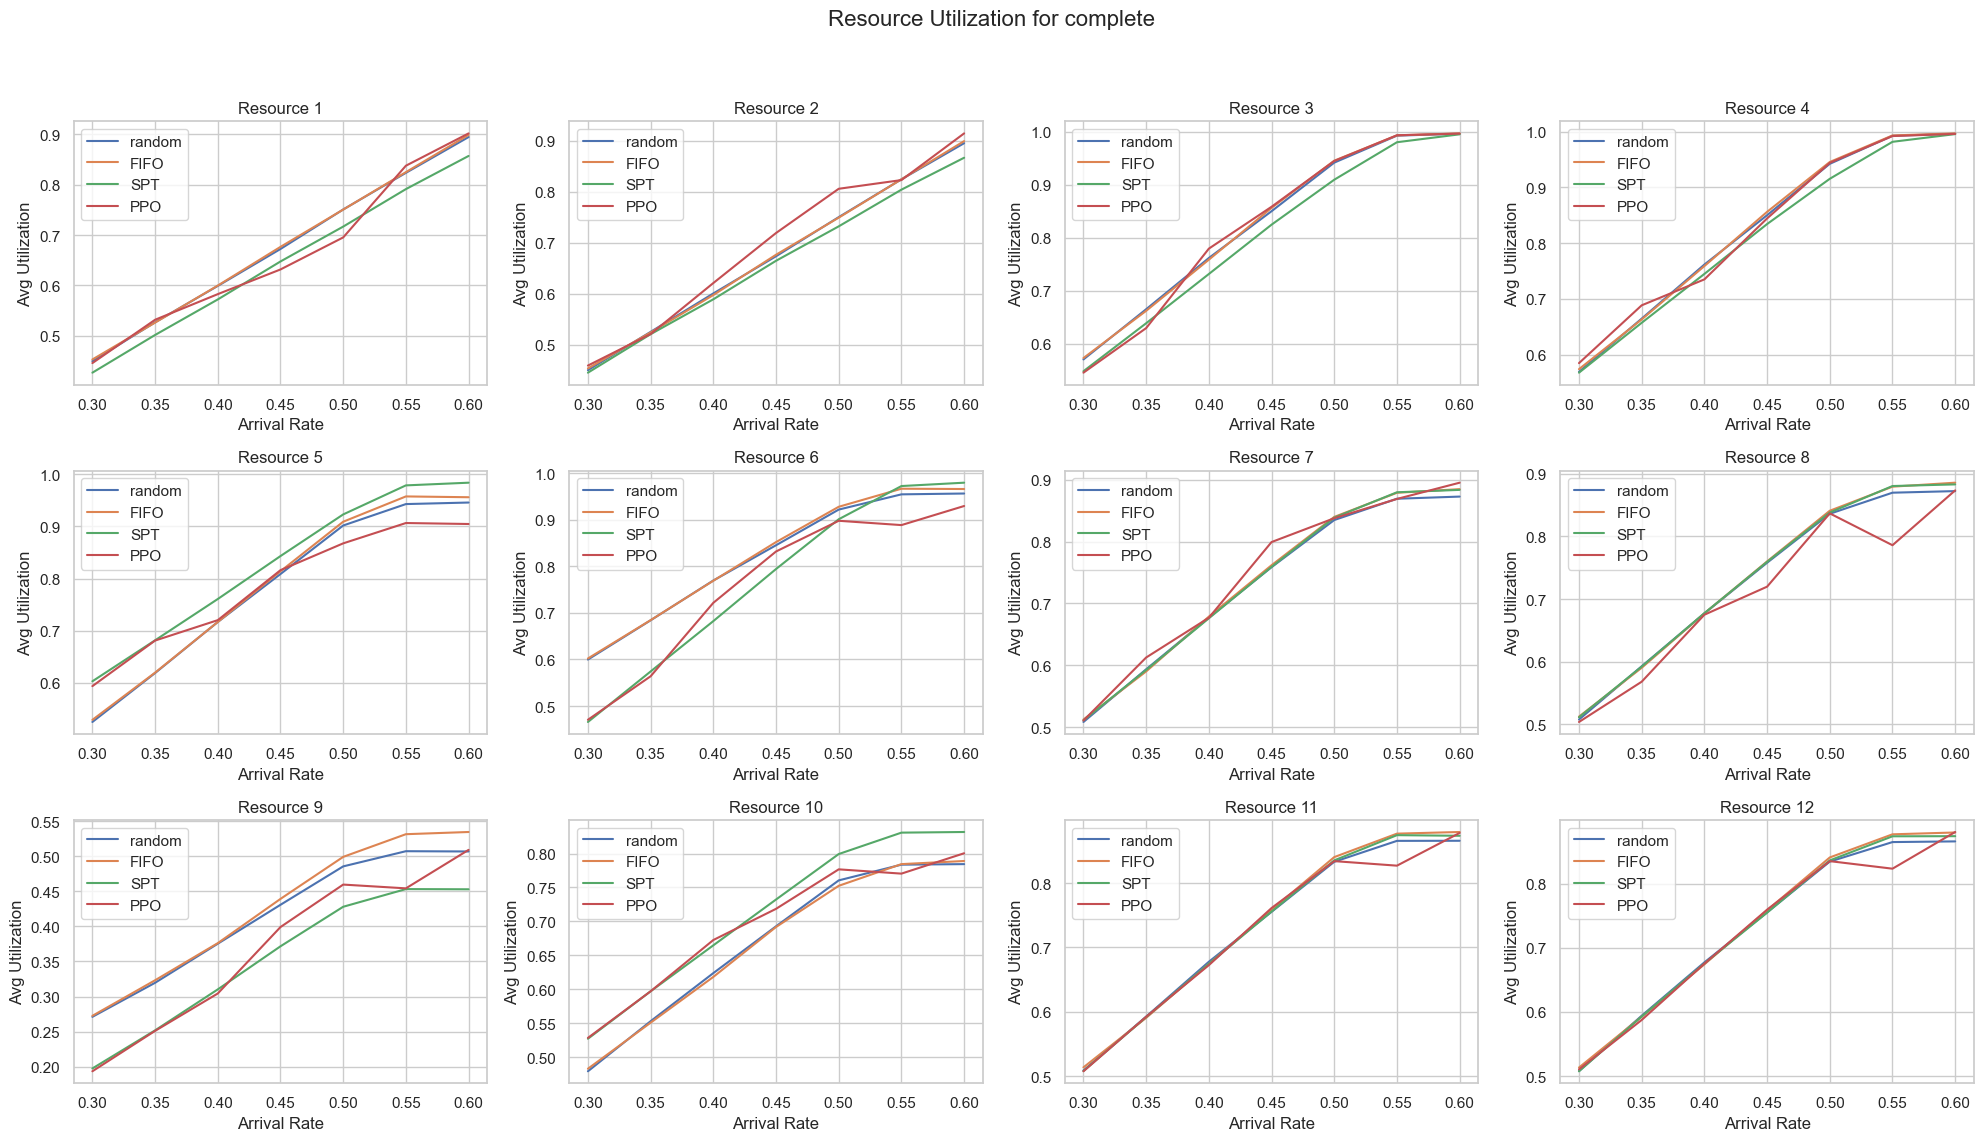

config: complete_reversed


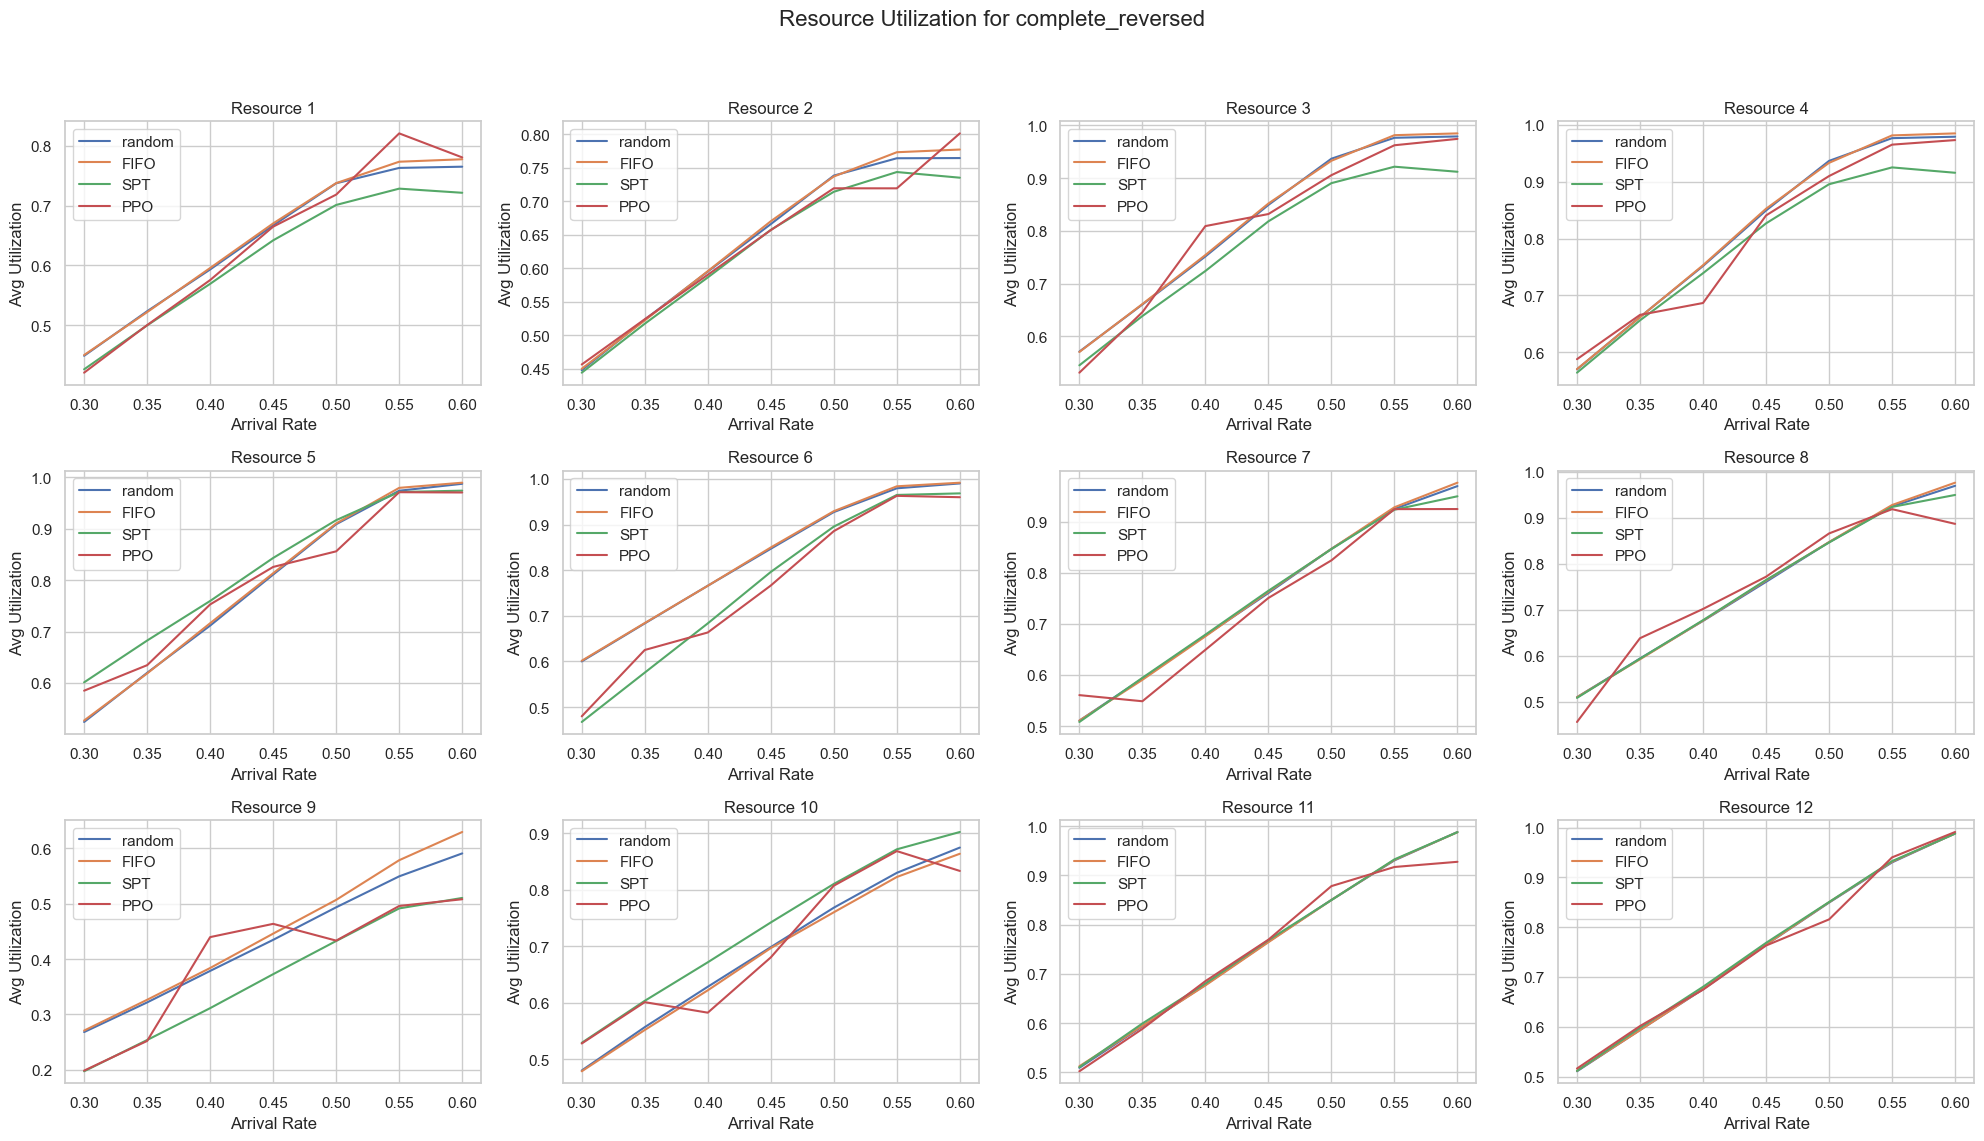

config: complete_parallel


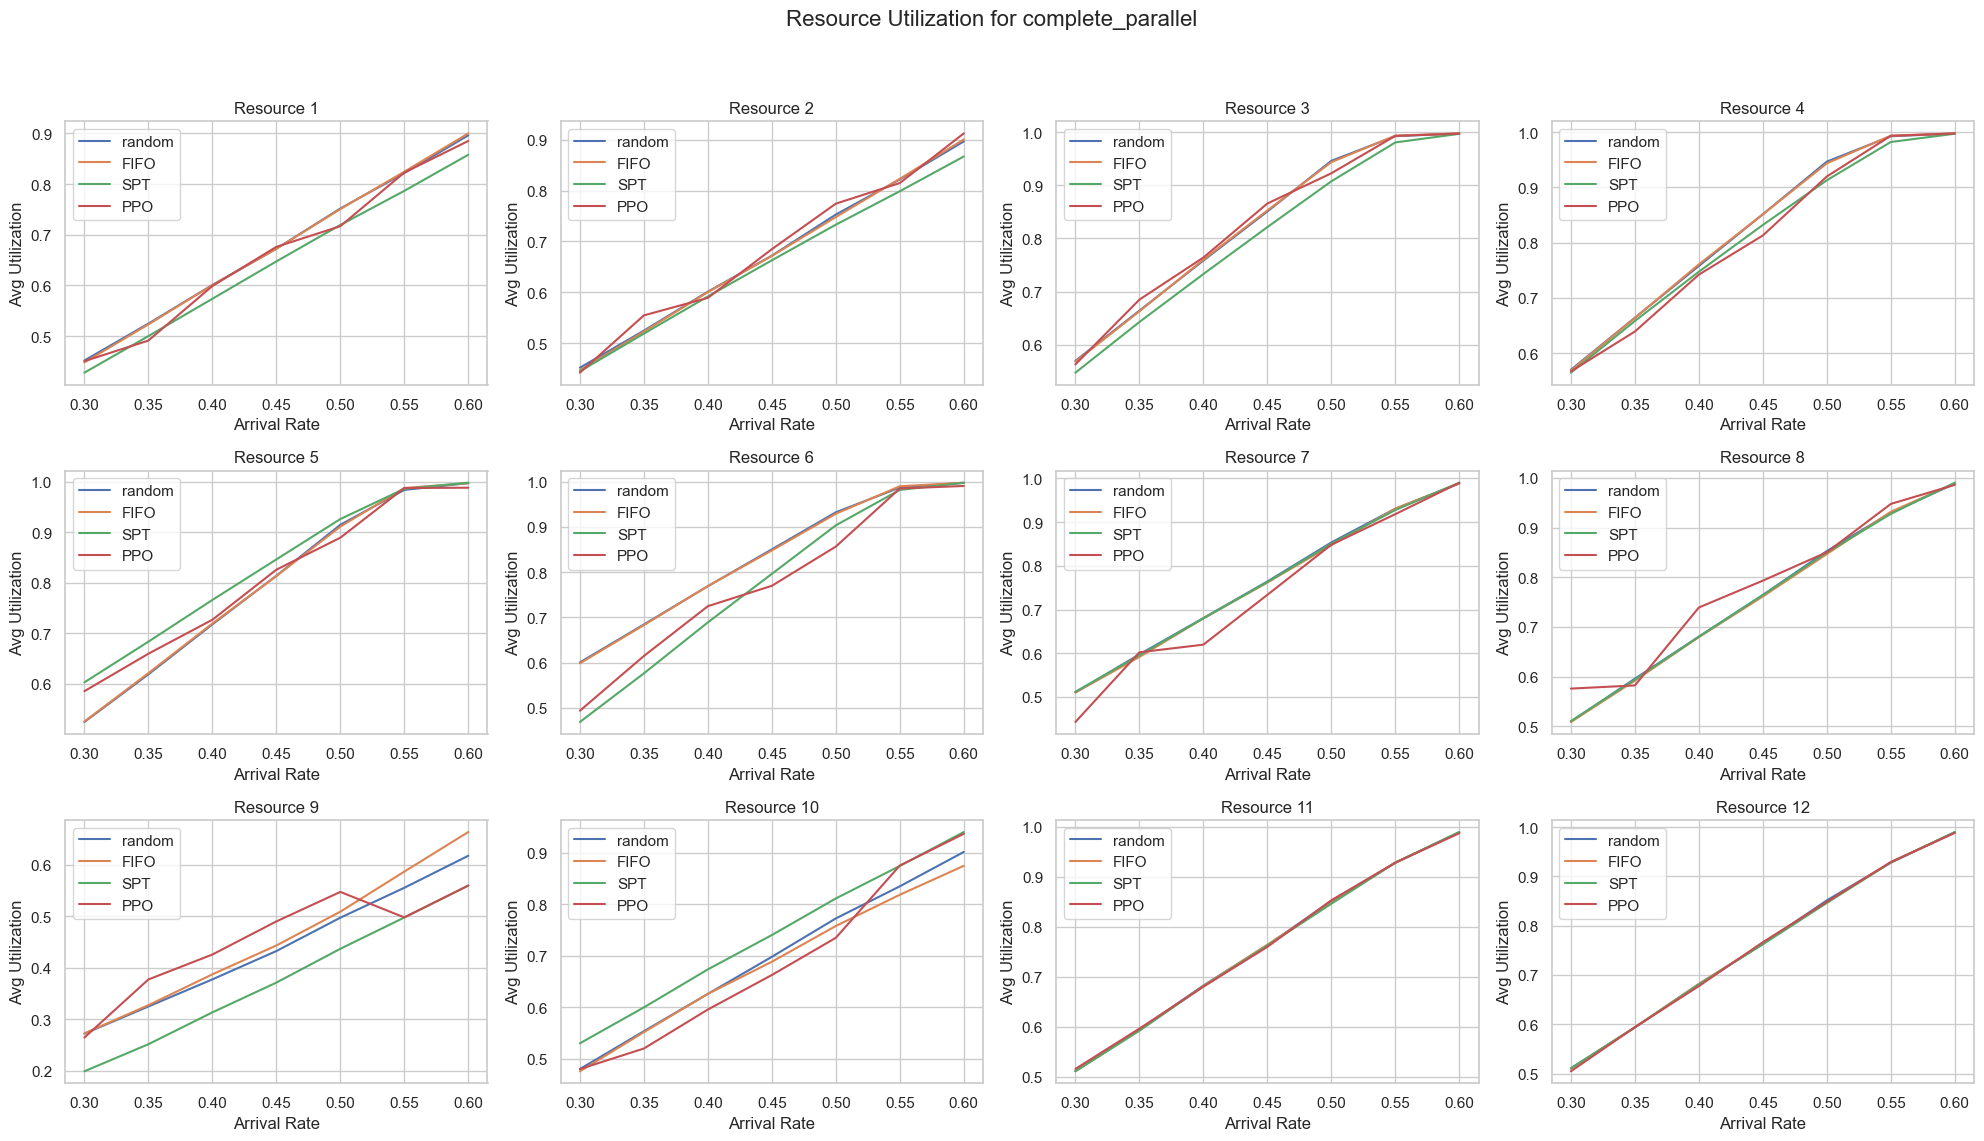

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

# Apply a Seaborn theme
sns.set(style="whitegrid")

configs = ['complete', 'complete_reversed', 'complete_parallel']
arrival_rates = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
policies = ['random', 'FIFO', 'SPT', 'PPO']
heuristic_policy_names = {'random': 'Random', 'FIFO': 'FIFO', 'SPT': 'ShortestProcessingTime', 'PPO': 'PPO'}
label_policy_names = {'random': 'Random', 'FIFO': 'FIFO', 'SPT': 'SPT', 'PPO': 'DRL', 'SVFA': 'SVFA','DDQN': 'DDQN', 'ParkSong': 'ParkSong'}

# Initialize data structure without pre-defining resources
utilization_data = {config: {policy: {} for policy in policies} for config in configs}

# Process data
for config in configs:
    for arrival_rate in arrival_rates:
        for policy in policies:
            df = pd.read_csv(f'results_revision/results_{policy}/{heuristic_policy_names[policy]}_{config}_{str(arrival_rate)}.txt')
            columns_with_resource = [col for col in df.columns if 'Resource' in col]
            # Dynamically update the resources for each policy and config
            if not utilization_data[config][policy]:
                utilization_data[config][policy] = {resource: [] for resource in columns_with_resource}
            for resource in columns_with_resource:
                avg_utilization = df[resource].mean()
                utilization_data[config][policy][resource].append(avg_utilization)

# Plotting with Seaborn
for config in configs:
    print('config:', config)
    policies_data = utilization_data[config]
    resources = next(iter(policies_data.values())).keys()
    num_resources = len(resources)
    fig, axs = plt.subplots(3, 4, figsize=(20, 12))  # Adjust for a 4x3 grid
    fig.suptitle(f'Resource Utilization for {config}', fontsize=16)
    axs = axs.flatten()  # Flatten the array for easy indexing
    
    for i, resource in enumerate(resources):
        ax = axs[i]  # Current axis
        for policy in policies:
            sns.lineplot(x=arrival_rates, y=utilization_data[config][policy][resource], label=f'{label_policy_names[policy]}', ax=ax)
        ax.set_title(f'{resource}')
        ax.set_xlabel('Arrival Rate')
        ax.set_ylabel('Avg Utilization')
        ax.legend()
        ax.grid(True)
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to not overlap with suptitle
    plt.show()